In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 1
dim = 30
numRuns = 51
pop_size = 300
percMaxEvals = 0.7
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[1_30_51_300_0.7_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[1_30_51_300_0.7_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	18823095.7473

Best Fitness:	7999126.6075
Solution:	100.0000
Diff:		7999026.6075

[0:28:13][----------] 1.96% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	26892065.2423

Best Fitness:	11376656.6895
Solution:	100.0000
Diff:		11376556.6895

[0:53:24][----------] 3.92% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	18891329.0923

Best Fitness:	8826784.4122
Solution:	100.0000
Diff:		8826684.4122

[1:17:43][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	12702349.1796

Best Fitness:	5050685.7393
Solution:	100.0000
Diff:		5050585.7393

[1:41:50][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	28422761.2536

Best Fitness:	12381501.5195
Solution:	100.0000
Diff:		12381401.5195

[2:04:40][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	12886458.6309

Best Fitness:	4354724.8373
Solution:	100.0000
Diff:		4354624.8373

[2:27:21][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	13053593.8395

Best Fitness:	4163232.1273
Solution:	100.0000
Diff:		4163132.1273

[2:47:46][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	14051161.1226

Best Fitness:	7373548.0987
Solution:	100.0000
Diff:		7373448.0987

[3:07:43][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	15121359.3056

Best Fitness:	7806199.4244
Solution:	100.0000
Diff:		7806099.4244

[3:27:05][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	10113927.3530

Best Fitness:	3762260.6315
Solution:	100.0000
Diff:		3762160.6315

[3:45:15][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	18539802.7005

Best Fitness:	7275373.1655
Solution:	100.0000
Diff:		7275273.1655

[4:04:04][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	14482760.6667

Best Fitness:	6409247.1891
Solution:	100.0000
Diff:		6409147.1891

[4:22:10][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	10946753.2477

Best Fitness:	4929070.1932
Solution:	100.0000
Diff:		4928970.1932

[4:40:52][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	9997333.2122

Best Fitness:	6310637.2522
Solution:	100.0000
Diff:		6310537.2522

[4:58:27][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	17977843.1105

Best Fitness:	8524410.3811
Solution:	100.0000
Diff:		8524310.3811

[5:14:11][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	20517482.6117

Best Fitness:	8123372.6338
Solution:	100.0000
Diff:		8123272.6338

[5:28:28][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	18185242.8508

Best Fitness:	7546490.3618
Solution:	100.0000
Diff:		7546390.3618

[5:41:57][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	30735718.7963

Best Fitness:	12658975.8781
Solution:	100.0000
Diff:		12658875.8781

[5:55:29][####------] 35.29% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	19629194.8713

Best Fitness:	11006167.5718
Solution:	100.0000
Diff:		11006067.5718

[6:07:49][####------] 37.25% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	15358250.8130

Best Fitness:	6613502.3229
Solution:	100.0000
Diff:		6613402.3229

[6:20:03][####------] 39.22% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	11647414.3907

Best Fitness:	3959842.0706
Solution:	100.0000
Diff:		3959742.0706

[6:31:31][####------] 41.18% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	17143612.3303

Best Fitness:	8307620.6510
Solution:	100.0000
Diff:		8307520.6510

[6:41:48][####------] 43.14% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	12622344.6571

Best Fitness:	5862935.4218
Solution:	100.0000
Diff:		5862835.4218

[6:51:29][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	13044235.8153

Best Fitness:	5493275.6777
Solution:	100.0000
Diff:		5493175.6777

[7:00:12][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	17396318.2531

Best Fitness:	10462677.8531
Solution:	100.0000
Diff:		10462577.8531

[7:08:54][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	9706178.5612

Best Fitness:	3653882.0842
Solution:	100.0000
Diff:		3653782.0842

[7:17:33][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	11077162.9135

Best Fitness:	5205427.0113
Solution:	100.0000
Diff:		5205327.0113

[7:26:12][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	15187821.0815

Best Fitness:	7764540.1125
Solution:	100.0000
Diff:		7764440.1125

[7:34:50][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	12212338.5807

Best Fitness:	5465990.0934
Solution:	100.0000
Diff:		5465890.0934

[7:43:24][######----] 56.86% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	10121446.1187

Best Fitness:	5957290.1476
Solution:	100.0000
Diff:		5957190.1476

[7:50:59][######----] 58.82% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	12776650.5231

Best Fitness:	4650599.5610
Solution:	100.0000
Diff:		4650499.5610

[7:58:32][######----] 60.78% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	10134045.1684

Best Fitness:	5290193.0588
Solution:	100.0000
Diff:		5290093.0588

[8:06:02][######----] 62.75% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	16485539.6737

Best Fitness:	8450626.7217
Solution:	100.0000
Diff:		8450526.7217

[8:13:32][######----] 64.71% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	10838201.8454

Best Fitness:	4130779.7365
Solution:	100.0000
Diff:		4130679.7365

[8:21:02][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	14211323.3906

Best Fitness:	6693294.5185
Solution:	100.0000
Diff:		6693194.5185

[8:28:34][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	13128604.0456

Best Fitness:	5229873.0003
Solution:	100.0000
Diff:		5229773.0003

[8:36:05][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	8584791.0110

Best Fitness:	3543436.2833
Solution:	100.0000
Diff:		3543336.2833

[8:42:53][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	13062495.2994

Best Fitness:	7056715.6055
Solution:	100.0000
Diff:		7056615.6055

[8:49:40][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	13224800.7888

Best Fitness:	5941588.9538
Solution:	100.0000
Diff:		5941488.9538

[8:56:23][########--] 76.47% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	17611747.5688

Best Fitness:	8385794.5037
Solution:	100.0000
Diff:		8385694.5037

[9:03:06][########--] 78.43% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	8008460.7087

Best Fitness:	3987756.9783
Solution:	100.0000
Diff:		3987656.9783

[9:09:48][########--] 80.39% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	11026170.1237

Best Fitness:	5292797.9887
Solution:	100.0000
Diff:		5292697.9887

[9:16:38][########--] 82.35% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	14416518.4856

Best Fitness:	6315524.3880
Solution:	100.0000
Diff:		6315424.3880

[9:23:22][########--] 84.31% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	9910673.3929

Best Fitness:	3780395.8313
Solution:	100.0000
Diff:		3780295.8313

[9:30:47][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	13271592.9635

Best Fitness:	6569594.5864
Solution:	100.0000
Diff:		6569494.5864

[9:37:26][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	7252559.5858

Best Fitness:	3303184.6307
Solution:	100.0000
Diff:		3303084.6307

[9:44:08][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	10555475.4380

Best Fitness:	4168945.6819
Solution:	100.0000
Diff:		4168845.6819

[9:50:39][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	16342858.8248

Best Fitness:	6117008.7427
Solution:	100.0000
Diff:		6116908.7427

[9:57:16][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	15629578.6309

Best Fitness:	8985875.7999
Solution:	100.0000
Diff:		8985775.7999

[10:03:59][##########] 96.08% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	8289024.4260

Best Fitness:	4030222.0298
Solution:	100.0000
Diff:		4030122.0298

[10:10:32][##########] 98.04% 

Optimization ended due to max fitness evals (max = 210000.0, curr = 209400)


#Generations:	696

#FitnessEvals:	209400

Mean Fitness:	14778105.7666

Best Fitness:	7214530.1404
Solution:	100.0000
Diff:		7214430.1404

[10:17:24][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

10:17:24

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
691,1.883817e+07,9.974728e+06,1.824754e+07,1.246580e+07,1.826041e+07,1.748241e+07,1.154848e+07,1.418112e+07,1.893438e+07,1.000354e+07,...,1.647611e+07,1.825466e+07,1.371458e+07,1.709628e+07,2.143210e+07,1.939730e+07,1.761880e+07,1.105419e+07,1.457554e+07,50
692,1.883817e+07,9.974728e+06,1.824754e+07,1.246580e+07,1.826041e+07,1.748241e+07,1.154848e+07,1.418112e+07,1.893438e+07,1.000354e+07,...,1.647611e+07,1.825466e+07,1.371458e+07,1.709628e+07,2.143210e+07,1.939730e+07,1.761880e+07,1.105419e+07,1.457554e+07,50
693,1.883817e+07,9.974728e+06,1.824754e+07,1.246580e+07,1.826041e+07,1.748241e+07,1.154848e+07,1.418112e+07,1.893438e+07,1.000354e+07,...,1.647611e+07,1.825466e+07,1.371458e+07,1.709628e+07,2.143210e+07,1.939730e+07,1.761880e+07,1.105419e+07,1.457554e+07,50
694,1.883817e+07,9.974728e+06,1.824754e+07,1.246580e+07,1.826041e+07,1.748241e+07,1.154848e+07,1.418112e+07,1.893438e+07,1.000354e+07,...,1.647611e+07,1.825466e+07,1.371458e+07,1.709628e+07,2.143210e+07,1.939730e+07,1.761880e+07,1.105419e+07,1.457554e+07,50
695,1.883817e+07,9.974728e+06,1.824754e+07,1.246580e+07,1.826041e+07,1.748241e+07,1.154848e+07,1.418112e+07,1.893438e+07,1.000354e+07,...,1.647611e+07,1.825466e+07,1.371458e+07,1.709628e+07,2.143210e+07,1.939730e+07,1.761880e+07,1.105419e+07,1.457554e+07,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 7999026.607476966

Best error for run 1: 11376556.689466132

Best error for run 2: 8826684.412195949

Best error for run 3: 5050585.739317819

Best error for run 4: 12381401.519462915

Best error for run 5: 4354624.837272404

Best error for run 6: 4163132.127321305

Best error for run 7: 7373448.098667835

Best error for run 8: 7806099.424443285

Best error for run 9: 3762160.6314520906

Best error for run 10: 7275273.165532047

Best error for run 11: 6409147.189082012

Best error for run 12: 4928970.193184691

Best error for run 13: 6310537.252150811

Best error for run 14: 8524310.381117702

Best error for run 15: 8123272.633796624

Best error for run 16: 7546390.361841916

Best error for run 17: 12658875.878069904

Best error for run 18: 11006067.571763642

Best error for run 19: 6613402.322882079

Best error for run 20: 3959742.0706439572

Best error for run 21: 8307520.650951292

Best error for run 22: 5862835.42178405

Best error for run 23: 5493175.677708891

Best error for run 24: 10462577.853140073

Best error for run 25: 3653782.0842225226

Best error for run 26: 5205327.011314027

Best error for run 27: 7764440.1125059035

Best error for run 28: 5465890.093444917

Best error for run 29: 5957190.147648718

Best error for run 30: 4650499.560999219

Best error for run 31: 5290093.058785515

Best error for run 32: 8450526.721687699

Best error for run 33: 4130679.736474662

Best error for run 34: 6693194.518549991

Best error for run 35: 5229773.0002893

Best error for run 36: 3543336.2833247315

Best error for run 37: 7056615.6054651635

Best error for run 38: 5941488.953834668

Best error for run 39: 8385694.503716443

Best error for run 40: 3987656.9782824195

Best error for run 41: 5292697.988714894

Best error for run 42: 6315424.387974666

Best error for run 43: 3780295.831252669

Best error for run 44: 6569494.586353172

Best error for run 45: 3303084.6307301777

Best error for run 46: 4168845.681888532

Best error for run 47: 6116908.742727826

Best error for run 48: 8985775.799880523

Best error for run 49: 4030122.0298155304

Best error for run 50: 7214430.140384367

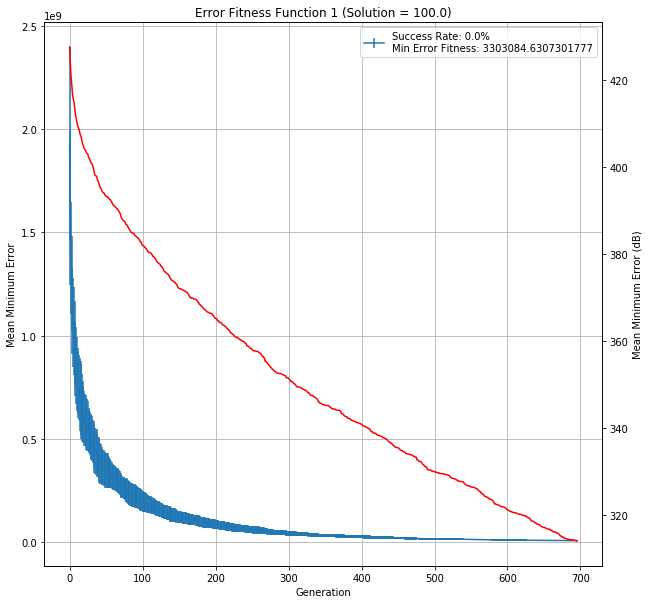

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[1_30_51_300_0.7_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,1,30,0.7,7.999027e+06,1.137656e+07,8.826684e+06,5.050586e+06,1.238140e+07,4.354625e+06,...,6.569495e+06,3.303085e+06,4.168846e+06,6.116909e+06,8.985776e+06,4.030122e+06,7.214430e+06,6.544296e+06,10:17:24,209400
